In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('diamonds_new.csv')

In [3]:
data.head()

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0
2,0.23,Good,E,VS1,65.0,4.05,4.07,2.31,163.5
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5


In [4]:
# Data of diamonds, carat is weight of diamond, cut is the quality of diamondd
# predicting price 

In [5]:
data.shape

(53940, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53841 non-null  float64
 1   cut        53940 non-null  object 
 2   color      53884 non-null  object 
 3   clarity    53940 non-null  object 
 4   table      53877 non-null  float64
 5   x          53940 non-null  float64
 6   y          53940 non-null  float64
 7   z          53940 non-null  float64
 8   price_new  53940 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.7+ MB


In [7]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'table', 'x', 'y', 'z',
       'price_new'],
      dtype='object')

In [8]:
data[['cut', 'color', 'clarity']]

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2
...,...,...,...
53935,Ideal,D,SI1
53936,Good,D,SI1
53937,Very Good,D,SI1
53938,Premium,H,SI2


In [9]:
data.describe()

,carat,table,x,y,z,price_new
count,53841.000000,53877.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.798120,57.457719,5.731157,5.734526,3.539635,1966.399861
std,0.474428,2.235742,1.121761,1.142135,0.703869,1994.719869
min,0.200000,43.000000,0.000000,0.000000,0.000000,163.000000
25%,0.400000,56.000000,4.710000,4.720000,2.910000,475.000000
50%,0.700000,57.000000,5.700000,5.710000,3.530000,1200.500000
75%,1.040000,59.000000,6.540000,6.540000,4.040000,2662.125000
max,5.010000,95.000000,10.740000,58.900000,31.800000,9411.500000


In [10]:
# min value of x,y,z is some error values
# x,y,z is length,width,height it cannot be zero

### Eliminating error values

In [11]:
zero_index = data[(data['x']==0)|(data['y']==0)|(data['z']==0)].index

In [12]:
zero_index

Int64Index([11182, 11963, 15951, 24520, 26243, 27429, 49556, 49557], dtype='int64')

In [13]:
data1 = data.drop(zero_index)

In [14]:
data1.shape

(53932, 9)

### Finding Outliers

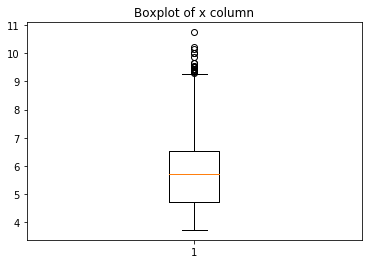

In [15]:
plt.boxplot(data1['x'])
plt.title('Boxplot of x column')
plt.show()

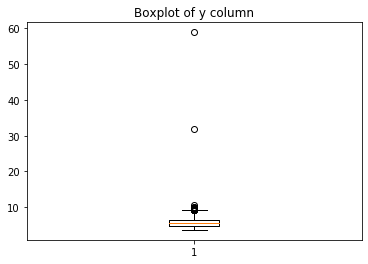

In [16]:
plt.boxplot(data1['y'])
plt.title('Boxplot of y column')
plt.show()

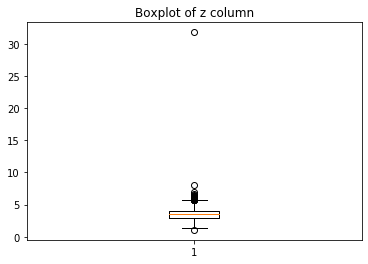

In [17]:
plt.boxplot(data1['z'])
plt.title('Boxplot of z column')
plt.show()

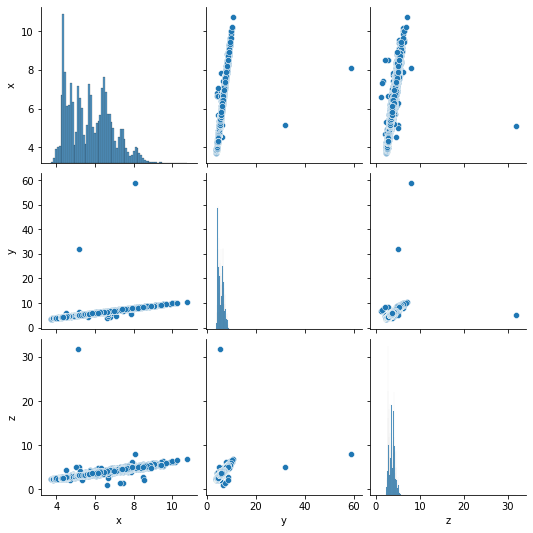

In [18]:
sns.pairplot(data1[['x','y','z']])
plt.show()

In [19]:
# here we drop values that are greater than

In [20]:
data1[data1['y']>30].index

Int64Index([24067, 49189], dtype='int64')

In [21]:
data1[data1['z']>30].index

Int64Index([48410], dtype='int64')

In [22]:
data2 = data1.drop([24067, 49189,48410])

In [23]:
data2.describe()

,carat,table,x,y,z,price_new
count,53830.000000,53866.000000,53929.000000,53929.000000,53929.000000,53929.000000
mean,0.798048,57.457669,5.731986,5.733796,3.539523,1966.026702
std,0.474385,2.235320,1.119649,1.111501,0.691693,1994.334768
min,0.200000,43.000000,3.730000,3.680000,1.070000,163.000000
25%,0.400000,56.000000,4.710000,4.720000,2.910000,474.500000
50%,0.700000,57.000000,5.700000,5.710000,3.530000,1200.500000
75%,1.040000,59.000000,6.540000,6.540000,4.040000,2662.000000
max,5.010000,95.000000,10.740000,10.540000,6.980000,9411.500000


In [24]:
data2.head()

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0
2,0.23,Good,E,VS1,65.0,4.05,4.07,2.31,163.5
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5


In [25]:
data2.isna().sum()

carat        99
cut           0
color        56
clarity       0
table        63
x             0
y             0
z             0
price_new     0
dtype: int64

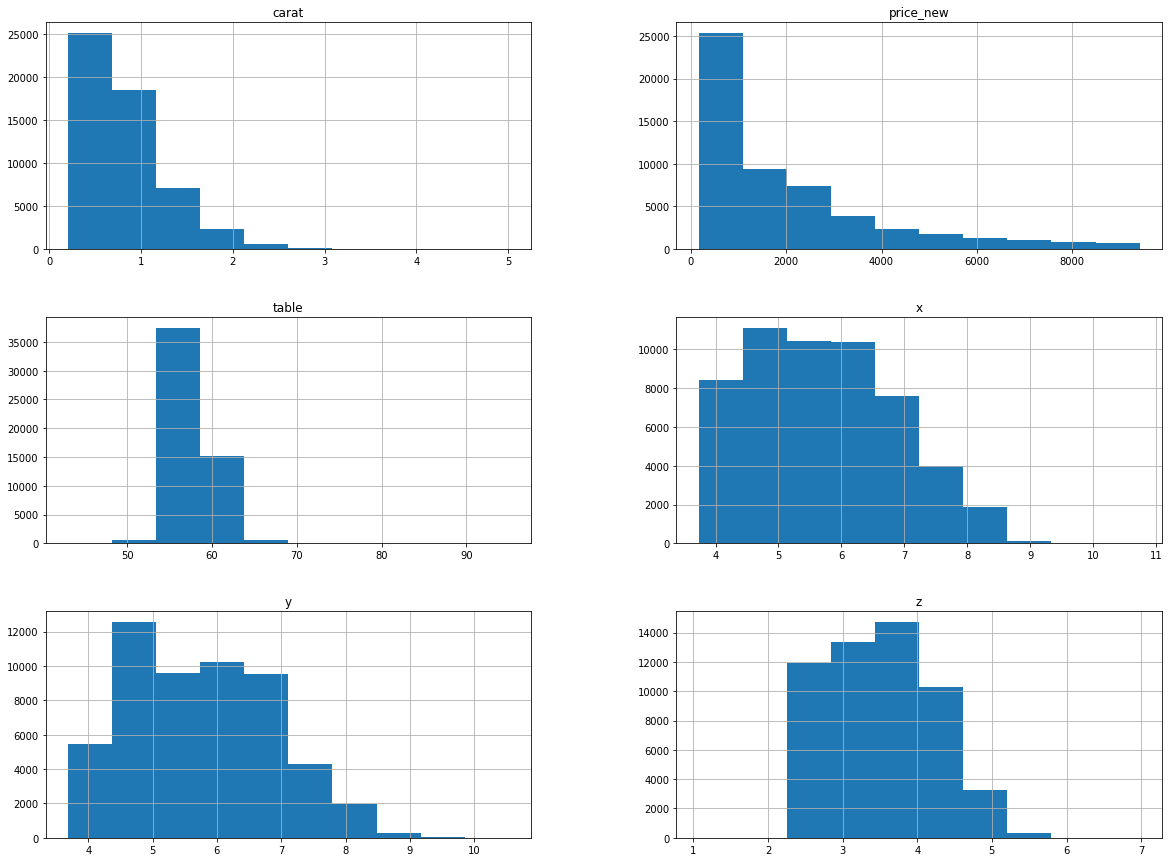

In [26]:
freqgraph = data2.select_dtypes(include=['float'])
freqgraph.hist(figsize = (20,15))
plt.show()

In [27]:
data2['carat'] = data2['carat'].fillna(data2['carat'].median())

In [28]:
data2['table'] = data2['table'].fillna(data2['table'].median())

In [29]:
data2['color'] = data2['color'].fillna(data2['color'].mode()[0])

In [30]:
data2.isna().sum()

carat        0
cut          0
color        0
clarity      0
table        0
x            0
y            0
z            0
price_new    0
dtype: int64

In [31]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53929 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53929 non-null  float64
 1   cut        53929 non-null  object 
 2   color      53929 non-null  object 
 3   clarity    53929 non-null  object 
 4   table      53929 non-null  float64
 5   x          53929 non-null  float64
 6   y          53929 non-null  float64
 7   z          53929 non-null  float64
 8   price_new  53929 non-null  float64
dtypes: float64(6), object(3)
memory usage: 4.1+ MB


In [32]:
data2['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [33]:
data2['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [34]:
data2['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [35]:
replace_map = {'cut': {'Fair': 1, 'Very Good': 2, 'Good': 3, 'Premium': 4,
                                  'Ideal': 5 }}

In [36]:
data2.replace(replace_map, inplace=True)

print(data2.head())

   carat  cut color clarity  table     x     y     z  price_new
0   0.23    5     E     SI2   55.0  3.95  3.98  2.43      163.0
1   0.21    4     E     SI1   61.0  3.89  3.84  2.31      163.0
2   0.23    3     E     VS1   65.0  4.05  4.07  2.31      163.5
3   0.29    4     I     VS2   58.0  4.20  4.23  2.63      167.0
4   0.31    3     J     SI2   58.0  4.34  4.35  2.75      167.5


In [37]:
replace_map = {'clarity':{'SI2':2, 'SI1':3, 'VS1':5, 'VS2':4, 'VVS2':6, 'VVS1':7, 'I1':1, 'IF':8}}

In [38]:
data2.replace(replace_map, inplace=True)

In [39]:
label_encoder = LabelEncoder()
data2['color'] = label_encoder.fit_transform(data2['color'])

In [40]:
data2.head()

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,5,1,2,55.0,3.95,3.98,2.43,163.0
1,0.21,4,1,3,61.0,3.89,3.84,2.31,163.0
2,0.23,3,1,5,65.0,4.05,4.07,2.31,163.5
3,0.29,4,5,4,58.0,4.20,4.23,2.63,167.0
4,0.31,3,6,2,58.0,4.34,4.35,2.75,167.5


In [41]:
data2.shape

(53929, 9)

In [42]:
X = data2.drop(['price_new'], axis=1)
y = data2['price_new']

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
lr = LinearRegression()
model = lr.fit(X_train, y_train)
predictions = model.predict(X_test)

In [46]:
from sklearn.metrics import mean_squared_error, r2_score

In [47]:
print('Mean Square Error is:', mean_squared_error(y_test, predictions))
print('R Squared Value is: ',r2_score(y_test, predictions))

Mean Square Error is: 361397.8592131486
R Squared Value is:  0.9083353133691614


In [48]:
# Min max Scaling

In [49]:
X.columns

Index(['carat', 'cut', 'color', 'clarity', 'table', 'x', 'y', 'z'], dtype='object')

In [50]:
X.describe()

,carat,cut,color,clarity,table,x,y,z
count,53929.000000,53929.000000,53929.000000,53929.000000,53929.000000,53929.000000,53929.000000,53929.000000
mean,0.797868,3.771125,2.594244,4.051104,57.457134,5.731986,5.733796,3.539523
std,0.473967,1.265960,1.701174,1.647121,2.234069,1.119649,1.111501,0.691693
min,0.200000,1.000000,0.000000,1.000000,43.000000,3.730000,3.680000,1.070000
25%,0.400000,2.000000,1.000000,3.000000,56.000000,4.710000,4.720000,2.910000
50%,0.700000,4.000000,3.000000,4.000000,57.000000,5.700000,5.710000,3.530000
75%,1.040000,5.000000,4.000000,5.000000,59.000000,6.540000,6.540000,4.040000
max,5.010000,5.000000,6.000000,8.000000,95.000000,10.740000,10.540000,6.980000


In [51]:
X.isna().sum()

carat      0
cut        0
color      0
clarity    0
table      0
x          0
y          0
z          0
dtype: int64

In [52]:
from sklearn.preprocessing import MinMaxScaler

In [53]:
min_max_scaler = MinMaxScaler(feature_range=(0,1))

In [54]:
X1 = X.drop(['cut', 'color', 'clarity'], axis=1)

In [55]:
X1.head()

,carat,table,x,y,z
0,0.23,55.0,3.95,3.98,2.43
1,0.21,61.0,3.89,3.84,2.31
2,0.23,65.0,4.05,4.07,2.31
3,0.29,58.0,4.20,4.23,2.63
4,0.31,58.0,4.34,4.35,2.75


In [56]:
X1 = min_max_scaler.fit_transform(X1)

In [57]:
X1 = pd.DataFrame(X1,columns =['carat', 'table', 'x', 'y', 'z'])

In [58]:
X1.shape

(53929, 5)

In [59]:
X.shape

(53929, 8)

In [60]:
X.drop(['carat', 'table', 'x', 'y', 'z'], axis=1, inplace=True)

In [61]:
X.reset_index(drop=True, inplace=True)
X1.reset_index(drop=True, inplace=True)

In [62]:
X = pd.concat([X,X1], axis=1)

In [63]:
X

,cut,color,clarity,carat,table,x,y,z
0,5,1,2,0.006237,0.230769,0.031384,0.043732,0.230118
1,4,1,3,0.002079,0.346154,0.022825,0.023324,0.209814
2,3,1,5,0.006237,0.423077,0.045649,0.056851,0.209814
3,4,5,4,0.018711,0.288462,0.067047,0.080175,0.263959
4,3,6,2,0.022869,0.288462,0.087019,0.097668,0.284264
...,...,...,...,...,...,...,...,...
53924,5,0,3,0.108108,0.269231,0.288160,0.303207,0.411168
53925,3,0,3,0.108108,0.230769,0.279601,0.301749,0.429780
53926,2,0,3,0.103950,0.326923,0.275321,0.291545,0.421320
53927,4,4,2,0.137214,0.288462,0.345221,0.355685,0.451777


In [64]:
X.shape

(53929, 8)

In [65]:
y.shape

(53929,)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [67]:
lr = LinearRegression()
model = lr.fit(X_train, y_train)
predictions = model.predict(X_test)

In [68]:
print('Mean Square Error is:', mean_squared_error(y_test, predictions))
print('R Squared Value is: ',r2_score(y_test, predictions))

Mean Square Error is: 361397.8592131487
R Squared Value is:  0.9083353133691613


In [69]:
# Standard Scaling

In [70]:
X = data2.drop(['price_new'], axis=1)
y = data2['price_new']

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
std_scl = StandardScaler()

In [73]:
X = std_scl.fit_transform(X)

In [74]:
X = pd.DataFrame(X,columns =['carat', 'cut', 'color', 'clarity', 'table', 'x', 'y', 'z'])

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [76]:
lr = LinearRegression()
model = lr.fit(X_train, y_train)
predictions = model.predict(X_test)

In [77]:
print('Mean Square Error is:', mean_squared_error(y_test, predictions))
print('R Squared Value is: ',r2_score(y_test, predictions))

Mean Square Error is: 361397.85921314877
R Squared Value is:  0.9083353133691613


In [78]:
# Normalization

In [79]:
X = data2.drop('price_new', axis=1)
y = data2['price_new']

In [80]:
from sklearn import preprocessing

In [81]:
X1 = X.drop(['cut', 'color', 'clarity'], axis=1)

In [82]:
X1 = preprocessing.normalize(X1)

In [83]:
X1 = pd.DataFrame(X1,columns =['carat', 'table', 'x', 'y', 'z'])

In [84]:
X.reset_index(drop=True, inplace=True)
X1.reset_index(drop=True, inplace=True)

In [85]:
X = pd.concat([X,X1], axis=1)

In [86]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,random_state=42,test_size=0.20)

In [87]:
lr = LinearRegression()
model = lr.fit(X_train, y_train)
predictions = model.predict(X_test)

In [88]:
print('Mean Square Error is:', mean_squared_error(y_test, predictions))
print('R Squared Value is: ',r2_score(y_test, predictions))

Mean Square Error is: 344363.21039789484
R Squared Value is:  0.9126559691387233


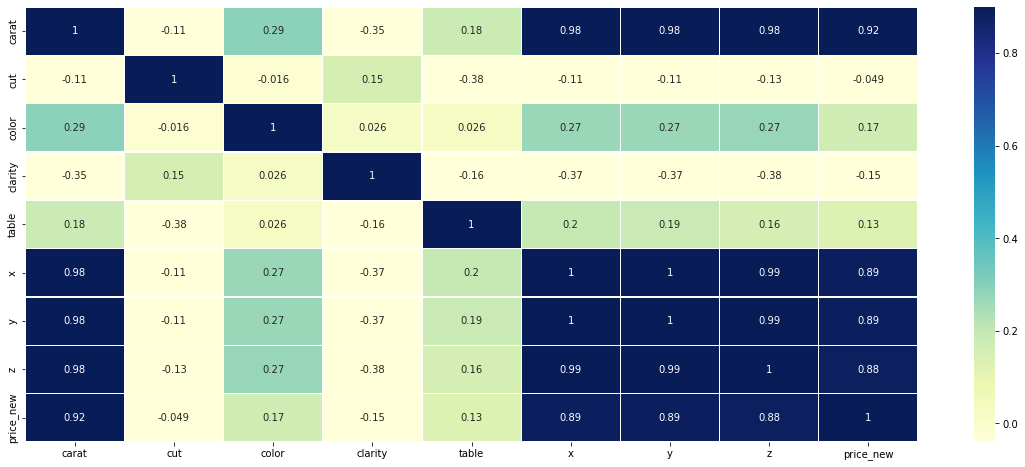

In [89]:
corrmatrix = data2.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=-.04, vmax=0.9, linewidth=0.2,annot=True,cmap='YlGnBu')
plt.show()

In [90]:
X = data2.drop(['cut','clarity','price_new'], axis=1)
y = data2['price_new']

In [91]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,random_state=42,test_size=0.20)

In [92]:
lr = LinearRegression()
model = lr.fit(X_train, y_train)
predictions = model.predict(X_test)

In [93]:
print('Mean Square Error is:', mean_squared_error(y_test, predictions))
print('R Squared Value is: ',r2_score(y_test, predictions))

Mean Square Error is: 508305.2495556419
R Squared Value is:  0.8710738311655363
